Imports

In [1]:
import pandas 
import numpy
import matplotlib.pyplot as plt
from datetime import datetime
from statsmodels.tsa.holtwinters import SimpleExpSmoothing


from pathlib import Path

folder = Path("Data")
folder.mkdir(parents=True, exist_ok=True)

Setting data

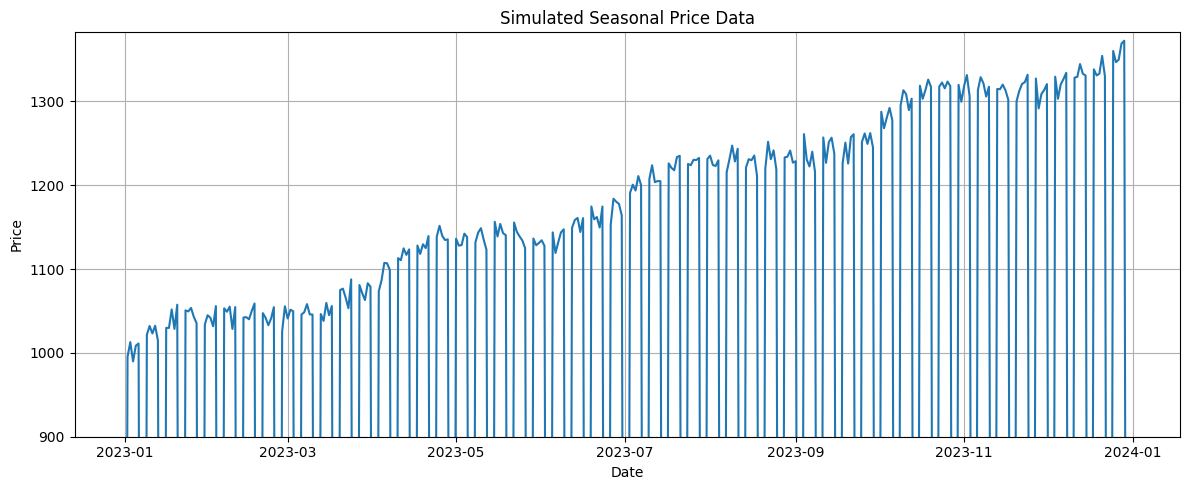

In [2]:
# Configuration
start_date = "2023-01-01"
end_date = "2023-12-31"
zero_on_weekends = True  # Set True if you want prices to be 0 on weekends

# Generate date range
dates = pandas.date_range(start=start_date, end=end_date, freq="D")
seasonal_plus_linear_growth_dataframe = pandas.DataFrame({"date": dates})
seasonal_plus_linear_growth_dataframe["day_of_year"] = seasonal_plus_linear_growth_dataframe["date"].dt.dayofyear
seasonal_plus_linear_growth_dataframe["day_of_week"] = seasonal_plus_linear_growth_dataframe["date"].dt.dayofweek  # 0=Mon, ..., 6=Sun

# Generate seasonal pattern (using sine curve)
# Example: simulate higher prices in middle of year (summer)
seasonal_pattern = 1000 + 20 * numpy.sin(8 * numpy.pi * seasonal_plus_linear_growth_dataframe["day_of_year"] / 365) #

# Add some trend (e.g., slow increase over time)
trend = seasonal_plus_linear_growth_dataframe["day_of_year"] * 1

# Add random noise
noise = numpy.random.normal(0, 10.0, size=len(seasonal_plus_linear_growth_dataframe))

# Final price = seasonality + trend + noise
seasonal_plus_linear_growth_dataframe["price"] = seasonal_pattern + trend + noise

# Optionally zero out weekends
if zero_on_weekends:
    seasonal_plus_linear_growth_dataframe.loc[seasonal_plus_linear_growth_dataframe["day_of_week"] >= 5, "price"] = 0

# Plot result
plt.figure(figsize=(12, 5))
plt.plot(seasonal_plus_linear_growth_dataframe["date"], seasonal_plus_linear_growth_dataframe["price"])
plt.title("Simulated Seasonal Price Data")
plt.xlabel("Date")
plt.ylabel("Price")
plt.grid(True)
plt.ylim(900, seasonal_plus_linear_growth_dataframe["price"].max() + 10)
plt.tight_layout()
plt.show()

# Save to CSV
seasonal_plus_linear_growth_dataframe[["date", "price"]].to_csv("Data/seasonal_plus_linear_growth.csv", index=False)

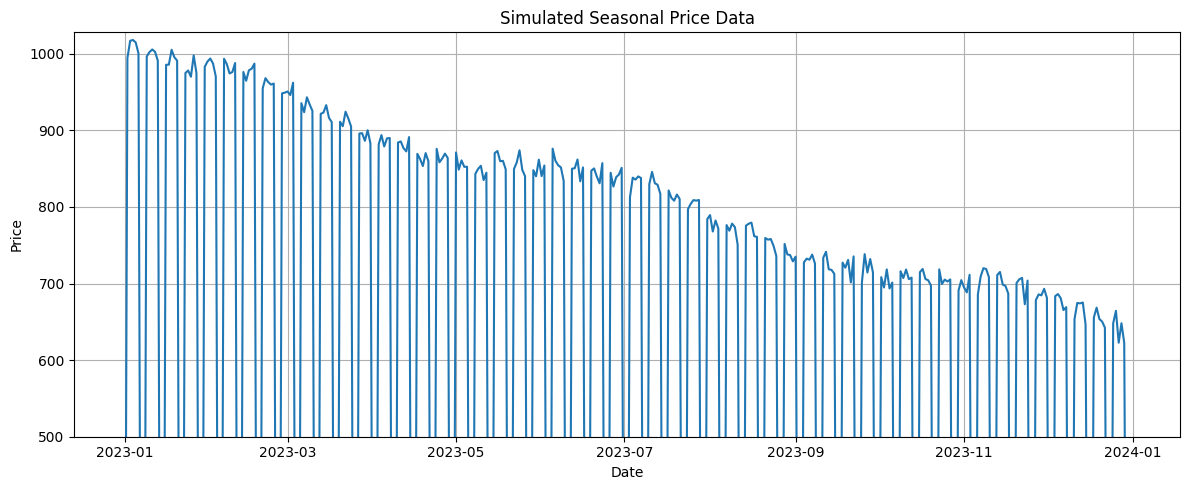

In [3]:
# Configuration
start_date = "2023-01-01"
end_date = "2023-12-31"
zero_on_weekends = True  # Set True if you want prices to be 0 on weekends

# Generate date range
dates = pandas.date_range(start=start_date, end=end_date, freq="D")
seasonal_plus_linear_growth_dataframe = pandas.DataFrame({"date": dates})
seasonal_plus_linear_growth_dataframe["day_of_year"] = seasonal_plus_linear_growth_dataframe["date"].dt.dayofyear
seasonal_plus_linear_growth_dataframe["day_of_week"] = seasonal_plus_linear_growth_dataframe["date"].dt.dayofweek  # 0=Mon, ..., 6=Sun

# Generate seasonal pattern (using sine curve)
# Example: simulate higher prices in middle of year (summer)
seasonal_pattern = 1000 + 20 * numpy.sin(5 * numpy.pi * seasonal_plus_linear_growth_dataframe["day_of_year"] / 365) #

# Add some trend (e.g., slow increase over time)
trend = seasonal_plus_linear_growth_dataframe["day_of_year"] * 1

# Add random noise
noise = numpy.random.normal(0, 10.0, size=len(seasonal_plus_linear_growth_dataframe))

# Final price = seasonality + trend + noise
seasonal_plus_linear_growth_dataframe["price"] = seasonal_pattern - trend + noise

# Optionally zero out weekends
if zero_on_weekends:
    seasonal_plus_linear_growth_dataframe.loc[seasonal_plus_linear_growth_dataframe["day_of_week"] >= 5, "price"] = 0

# Plot result
plt.figure(figsize=(12, 5))
plt.plot(seasonal_plus_linear_growth_dataframe["date"], seasonal_plus_linear_growth_dataframe["price"])
plt.title("Simulated Seasonal Price Data")
plt.xlabel("Date")
plt.ylabel("Price")
plt.grid(True)
plt.ylim(500, seasonal_plus_linear_growth_dataframe["price"].max() + 10)
plt.tight_layout()
plt.show()

# Save to CSV
seasonal_plus_linear_growth_dataframe[["date", "price"]].to_csv("Data/seasonal_plus_linear_decrease.csv", index=False)

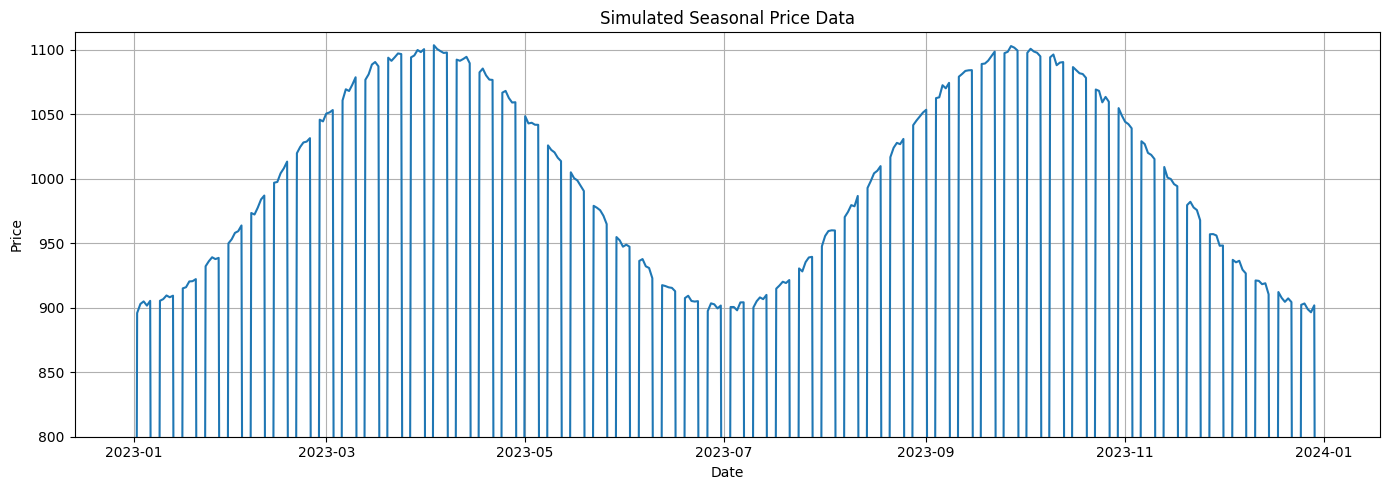

In [4]:
# Configuration
start_date = "2023-01-01"
end_date = "2023-12-31"
zero_on_weekends = True  # Set True if you want prices to be 0 on weekends

# Generate date range
dates = pandas.date_range(start=start_date, end=end_date, freq="D")
seasonal__dataframe = pandas.DataFrame({"date": dates})
seasonal__dataframe["day_of_year"] = seasonal__dataframe["date"].dt.dayofyear
seasonal__dataframe["day_of_week"] = seasonal__dataframe["date"].dt.dayofweek  # 0=Mon, ..., 6=Sun

# Generate seasonal pattern (using sine curve)
# Example: simulate higher prices in middle of year (summer)
shift_days = 45
seasonal_pattern = 1000 + 100 * numpy.sin(4 * numpy.pi * (seasonal__dataframe["day_of_year"] - shift_days) / 365)

# Add random noise
noise = numpy.random.normal(0, 2.0, size=len(seasonal__dataframe))

# Final price = seasonality + trend + noise
seasonal__dataframe["price"] = seasonal_pattern + noise

# Optionally zero out weekends
if zero_on_weekends:
    seasonal__dataframe.loc[seasonal__dataframe["day_of_week"] >= 5, "price"] = 0

# Plot result
plt.figure(figsize=(14, 5))
plt.plot(seasonal__dataframe["date"], seasonal__dataframe["price"])
plt.title("Simulated Seasonal Price Data")
plt.xlabel("Date")
plt.ylabel("Price")
plt.grid(True)
plt.tight_layout()
plt.ylim(800, seasonal__dataframe["price"].max() + 10)
plt.show()

# Save to CSV
seasonal__dataframe[["date", "price"]].to_csv("Data/seasonal_price_data.csv", index=False)

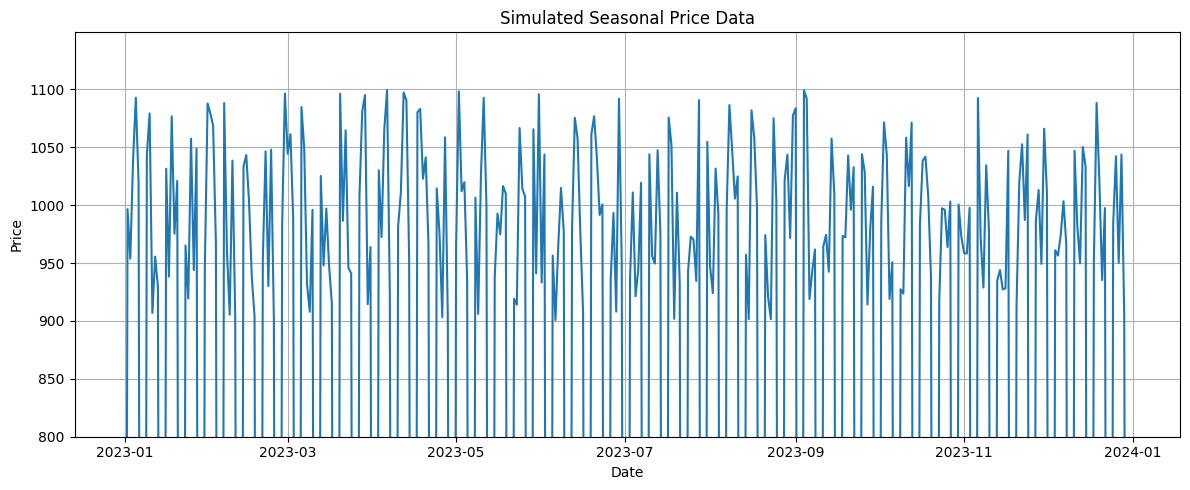

In [5]:
# Configuration
start_date = "2023-01-01"
end_date = "2023-12-31"
zero_on_weekends = True  # Set True if you want prices to be 0 on weekends

# Generate date range
dates = pandas.date_range(start=start_date, end=end_date, freq="D")
seasonal_plus_linear_growth_dataframe = pandas.DataFrame({"date": dates})
seasonal_plus_linear_growth_dataframe["day_of_year"] = seasonal_plus_linear_growth_dataframe["date"].dt.dayofyear
seasonal_plus_linear_growth_dataframe["day_of_week"] = seasonal_plus_linear_growth_dataframe["date"].dt.dayofweek  # 0=Mon, ..., 6=Sun

trend = numpy.random.uniform(-0.1, 0.1, size=len(dates))

prices = [numpy.float64(1000)]

for r in trend[1:]:
    new_price = prices[0] * (1 + r)
    prices.append(new_price)

seasonal_plus_linear_growth_dataframe['price'] = prices

# Optionally zero out weekends
if zero_on_weekends:
    seasonal_plus_linear_growth_dataframe.loc[seasonal_plus_linear_growth_dataframe["day_of_week"] >= 5, "price"] = 0


# # Plot result
plt.figure(figsize=(12, 5))
plt.plot(seasonal_plus_linear_growth_dataframe["date"], seasonal_plus_linear_growth_dataframe["price"])
plt.title("Simulated Seasonal Price Data")
plt.xlabel("Date")
plt.ylabel("Price")
plt.grid(True)
plt.ylim(800, seasonal_plus_linear_growth_dataframe["price"].max() + 50)
plt.tight_layout()
plt.show()

# # Save to CSV
seasonal_plus_linear_growth_dataframe[["date", "price"]].to_csv("Data/linear_random_deviation.csv", index=False)

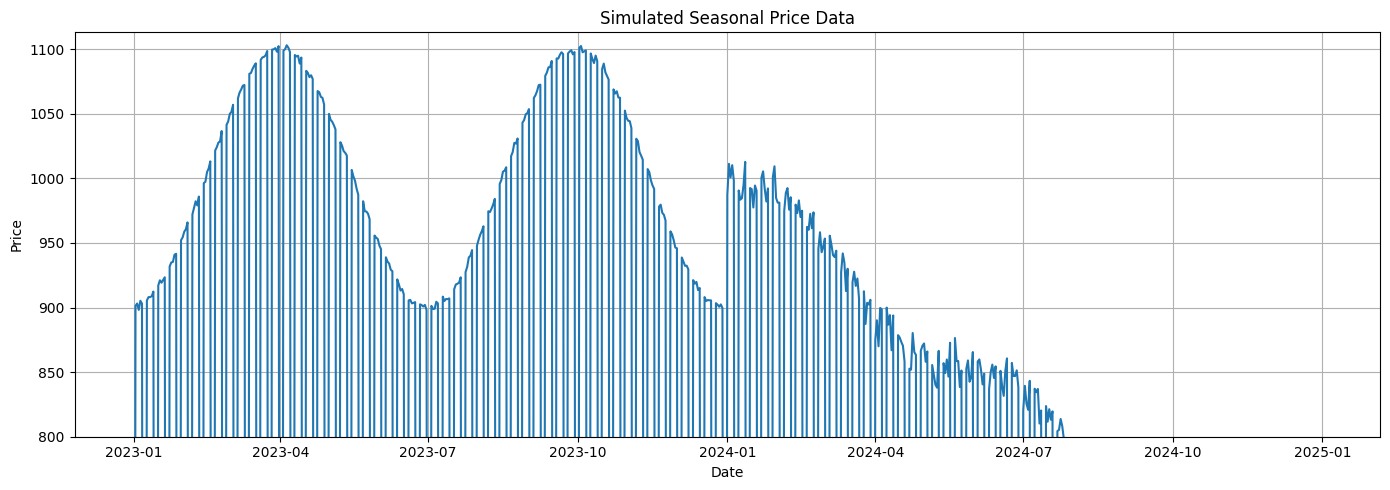

In [6]:
#Banduka dataset
# Configuration
start_date = "2023-01-01"
end_date = "2023-12-31"
zero_on_weekends = True  # Set True if you want prices to be 0 on weekends

# Generate date range
dates = pandas.date_range(start=start_date, end=end_date, freq="D")
seasonal__dataframe = pandas.DataFrame({"date": dates})
seasonal__dataframe["day_of_year"] = seasonal__dataframe["date"].dt.dayofyear
seasonal__dataframe["day_of_week"] = seasonal__dataframe["date"].dt.dayofweek  # 0=Mon, ..., 6=Sun

# Generate seasonal pattern (using sine curve)
# Example: simulate higher prices in middle of year (summer)
shift_days = 45
seasonal_pattern = 1000 + 100 * numpy.sin(4 * numpy.pi * (seasonal__dataframe["day_of_year"] - shift_days) / 365)

# Add random noise
noise = numpy.random.normal(0, 2.0, size=len(seasonal__dataframe))

# Final price = seasonality + trend + noise
seasonal__dataframe["price"] = seasonal_pattern + noise

# Optionally zero out weekends
if zero_on_weekends:
    seasonal__dataframe.loc[seasonal__dataframe["day_of_week"] >= 5, "price"] = 0

dataset = seasonal__dataframe.copy()

start_date = "2024-01-01"
end_date = "2024-12-31"
zero_on_weekends = True  # Set True if you want prices to be 0 on weekends

# Generate date range
dates = pandas.date_range(start=start_date, end=end_date, freq="D")
seasonal_plus_linear_growth_dataframe = pandas.DataFrame({"date": dates})
seasonal_plus_linear_growth_dataframe["day_of_year"] = seasonal_plus_linear_growth_dataframe["date"].dt.dayofyear
seasonal_plus_linear_growth_dataframe["day_of_week"] = seasonal_plus_linear_growth_dataframe["date"].dt.dayofweek  # 0=Mon, ..., 6=Sun

# Generate seasonal pattern (using sine curve)
# Example: simulate higher prices in middle of year (summer)
seasonal_pattern = 1000 + 20 * numpy.sin(5 * numpy.pi * seasonal_plus_linear_growth_dataframe["day_of_year"] / 365) #

# Add some trend (e.g., slow increase over time)
trend = seasonal_plus_linear_growth_dataframe["day_of_year"] * 1

# Add random noise
noise = numpy.random.normal(0, 10.0, size=len(seasonal_plus_linear_growth_dataframe))

# Final price = seasonality + trend + noise
seasonal_plus_linear_growth_dataframe["price"] = seasonal_pattern - trend + noise

# Optionally zero out weekends
if zero_on_weekends:
    seasonal_plus_linear_growth_dataframe.loc[seasonal_plus_linear_growth_dataframe["day_of_week"] >= 5, "price"] = 0

dataset = pandas.concat([dataset, seasonal_plus_linear_growth_dataframe], axis=0, ignore_index=False)

plt.figure(figsize=(14, 5))
plt.plot(dataset["date"], dataset["price"])
plt.title("Simulated Seasonal Price Data")
plt.xlabel("Date")
plt.ylabel("Price")
plt.grid(True)
plt.tight_layout()
plt.ylim(800, dataset["price"].max() + 10)
plt.show()

# Save to CSV
dataset[["date", "price"]].to_csv("Data/banduka_df.csv", index=False)

In [7]:
# df_300 = pandas.read_csv("Data/quality_controls2.csv")
# cols = ['frequency', 'costType', 'risk_id', 'created_at']
# df_300 = df_300[cols]
# df_300['date'] = pandas.to_datetime(df_300['created_at'])
# df_300['date'] = df_300['date'].dt.date


# unit_price = {
#     'finishing': 5,
#     'scrap':     50
# }
# df_300['unit_price'] = df_300['costType'].map(unit_price) # type: ignore
# df_300['price'] = df_300['frequency'] * df_300['unit_price']

# df_300 = (
#     df_300
#     .groupby(['date','risk_id'], as_index=False)['price']
#     .sum()
# )
# df_300 = df_300.set_index('date')

# df_risk1 = df_300[df_300['risk_id'] == 3]

In [8]:
from statsmodels.tsa.seasonal import STL

prices_dataframe = pandas.read_csv("Data/seasonal_price_data.csv")
prices_dataframe['date'] = pandas.to_datetime(prices_dataframe['date'])
prices_dataframe = prices_dataframe.set_index('date')
prices_dataframe = prices_dataframe[prices_dataframe.index.dayofweek < 5]


def season_trend_strength(series: pandas.Series, period: int):
    """Compute seasonal and trend strengths via STL."""
    stl = STL(series, period=period, robust=True).fit()
    resid = stl.resid
    seasonal = stl.seasonal
    trend = stl.trend

    var_resid = numpy.var(resid)
    var_season_plus_resid = numpy.var(resid + seasonal)
    var_trend_plus_resid = numpy.var(resid + trend)

    F_season = max(0, 1 - var_resid / var_season_plus_resid)
    F_trend  = max(0, 1 - var_resid / var_trend_plus_resid)
    
    # stl.plot()
    return F_season, F_trend

for name, per in [("Monthly", 30), ("Yearly", int(prices_dataframe.shape[0]/2)),("Quarter", 90)]:
    seasonal_strength,trend_strength = season_trend_strength(prices_dataframe, per)
    print(f"{name} seasonality strength (period={per}): {seasonal_strength:.2f}")
    print(f"{name} trend strength (period={per}): {trend_strength:.2f}")
    
# plt.figure(figsize=(12, 5))
# plt.plot(prices_dataframe.index, prices_dataframe["price"])
# plt.title("Simulated Seasonal Price Data")
# plt.xlabel("Date")
# plt.ylabel("Price")
# plt.grid(True)
# # plt.ylim(800, prices_dataframe["price"].max() + 50)
# plt.tight_layout()
# plt.show()

Monthly seasonality strength (period=30): 0.12
Monthly trend strength (period=30): 0.98
Yearly seasonality strength (period=130): 1.00
Yearly trend strength (period=130): 0.00
Quarter seasonality strength (period=90): 0.74
Quarter trend strength (period=90): 0.24


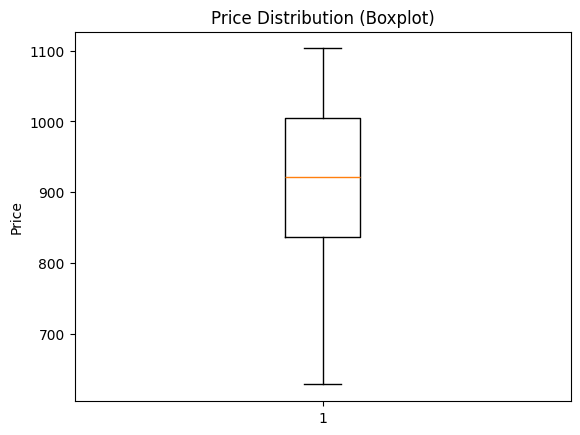

Lower outliers (below 584.7227424603268): 0
Upper outliers (above 1257.6884484468312): 0
Total clipped values: 0


In [478]:
prices_dataframe = pandas.read_csv("Data/banduka_df.csv")

min_date = prices_dataframe['date'].min()
prices_dataframe['date'] = pandas.to_datetime(prices_dataframe['date'])
prices_dataframe = prices_dataframe.set_index('date')

mask = (prices_dataframe.index.weekday == 5) & (prices_dataframe["price"] > 0)
num_saturdays_with_cost = mask.sum()

if num_saturdays_with_cost > prices_dataframe.shape[0] * 0.05:
    prices_dataframe = prices_dataframe[prices_dataframe.index.dayofweek < 6]
else:
    prices_dataframe = prices_dataframe[prices_dataframe.index.dayofweek < 5]

# Ensure datetime and set index

Q1  = prices_dataframe['price'].quantile(0.25)
Q3  = prices_dataframe['price'].quantile(0.75)
IQR = Q3 - Q1

# define bounds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

low_count  = (prices_dataframe['price'] <  lower_bound).sum()
high_count = (prices_dataframe['price'] >  upper_bound).sum()
total_outliers = low_count + high_count

plt.figure()
plt.boxplot(prices_dataframe['price'].dropna())
plt.title('Price Distribution (Boxplot)')
plt.ylabel('Price')
plt.show()

# clamp all values to [lower_bound, upper_bound]
prices_dataframe['price'] = prices_dataframe['price'].clip(lower=lower_bound, upper=upper_bound)

print(f"Lower outliers (below {lower_bound}): {low_count}")
print(f"Upper outliers (above {upper_bound}): {high_count}")
print(f"Total clipped values: {total_outliers}")

SES - Simple exponential smoothing

Total forecasted price: 401,856.74


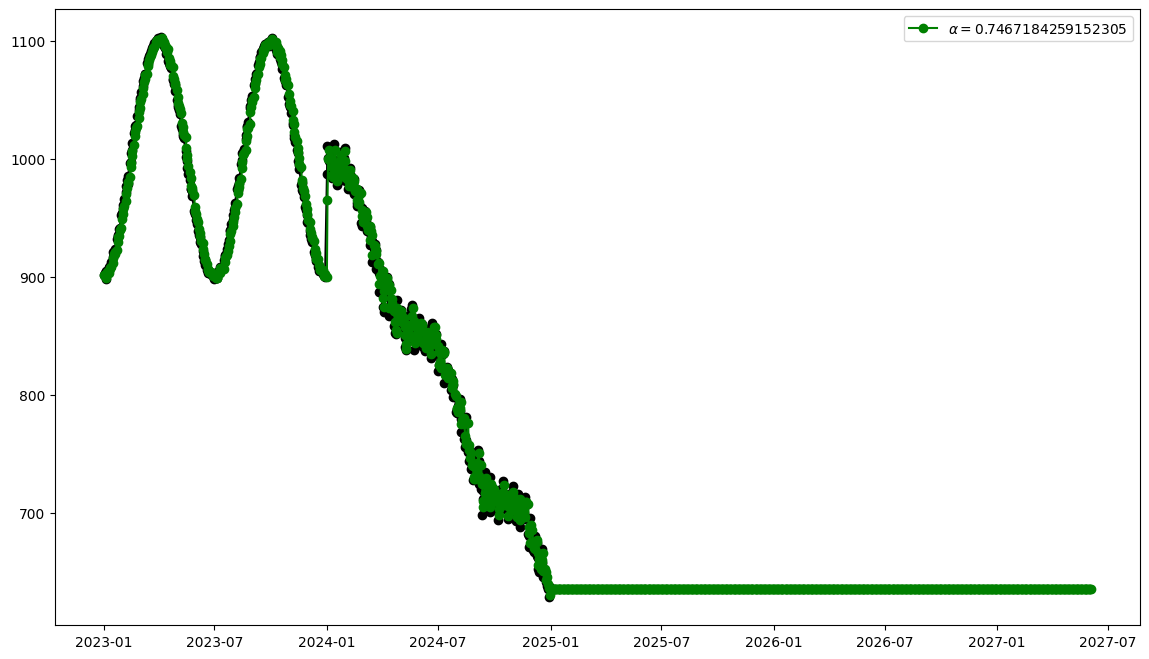

In [479]:
project_start_date = datetime.strptime('2024-12-31', "%Y-%m-%d")
project_end_date = datetime.strptime('2027-12-31', "%Y-%m-%d")

# current_date = prices_dataframe.index[-1]
current_date = datetime.strptime('2025-07-31', "%Y-%m-%d")
prediction_start_date = datetime.strptime('2025-10-02', "%Y-%m-%d")

count_excluding_end = pandas.bdate_range(start=current_date, end=project_end_date).size
train = prices_dataframe['price']
train = train.asfreq('C')


model_1  = SimpleExpSmoothing(train).fit(smoothing_level=0.25,optimized=False)   
model_2  = SimpleExpSmoothing(train).fit(smoothing_level=0.75,optimized=False)       

# # alpha oznacava odnos pravih i prediktovanih podataka u algoritmu. 25% znaci da je 25% vrednost predikcije a 75% realna vrednost.
fcast1 = model_1.forecast(count_excluding_end).rename(r"$\alpha=0.25$")
fcast2 = model_2.forecast(count_excluding_end).rename(r"$\alpha=0.75$")

fit3 = SimpleExpSmoothing(train).fit()
fcast3 = fit3.forecast(count_excluding_end).rename(r"$\alpha=%s$" % fit3.model.params["smoothing_level"])

plt.figure(figsize=(14, 8))
plt.plot(train, marker="o", color="black")
# plt.plot(model_1.fittedvalues, marker="o", color="blue")
# (line1,) = plt.plot(fcast1, marker="o", color="blue")
# plt.plot(model_2.fittedvalues, marker="o", color="red")
# (line2,) = plt.plot(fcast2, marker="o", color="red")
plt.plot(fit3.fittedvalues, marker="o", color="green")
(line3,) = plt.plot(fcast3, marker="o", color="green")
plt.legend([line3], [fcast3.name])

total_fcast3 = fcast3.sum()
print(f"Total forecasted price: {total_fcast3:,.2f}")

Linear regression

In [480]:
#Feature engineering
from statsmodels.tsa.stattools import acf

days_for_training = pandas.date_range(start=project_start_date, end=current_date, freq='D')
days_to_predict = pandas.date_range(start=prediction_start_date, end=project_end_date, freq='D')

if num_saturdays_with_cost > prices_dataframe.shape[0] * 0.05:
    days_to_predict = days_to_predict[days_to_predict.dayofweek < 6]
else:
    days_to_predict = days_to_predict[days_to_predict.dayofweek < 5]


df_risk1 = prices_dataframe.copy()

df_risk1['weekday'] = df_risk1.index.dayofweek



df_feat = df_risk1.copy().reset_index()

max_lag = df_feat.shape[0]
acf_vals = acf(df_feat["price"].dropna(), nlags=max_lag, fft=True)
search_vals = acf_vals[7 : max_lag + 1]
best_lag  = numpy.nanargmax(search_vals) + 7
print("Best lag")
print(best_lag, max_lag)

df_feat['is_saturday'] = (df_feat['weekday'] == 5).astype(int)
df_feat['is_sunday']   = (df_feat['weekday'] == 6).astype(int)
df_feat['dayofweek'] = df_feat['date'].dt.dayofweek
df_feat['quarter'] = df_feat['date'].dt.quarter
df_feat['month'] = df_feat['date'].dt.month
df_feat['year'] = df_feat['date'].dt.year
df_feat['dayofyear'] = df_feat['date'].dt.dayofyear
df_feat['dayofmonth'] = df_feat['date'].dt.day
df_feat['weekofyear'] = df_feat['date'].dt.isocalendar().week.astype(int)
df_feat['days_since_start'] = (df_feat['date'] - project_start_date).dt.days
df_feat['phase_cycle'] = (df_feat['days_since_start'] % best_lag) / best_lag

df_feat['sin_cycle'] = numpy.sin(2 * numpy.pi * df_feat['phase_cycle'])
df_feat['cos_cycle'] = numpy.cos(2 * numpy.pi * df_feat['phase_cycle'])

quarter_start_month = ((df_feat['quarter'] - 1) * 3 + 1)
quarter_start = pandas.to_datetime(
    df_feat['year'].astype(str) + '-' +
    quarter_start_month.astype(str).str.zfill(2) + '-01'
)
df_feat['day_of_quarter'] = (df_feat['date'] - quarter_start).dt.days + 1


corr = df_feat[['dayofyear', 'dayofmonth',
              'month', 'dayofweek', 'quarter', 'weekofyear','price', 'phase_cycle', 'sin_cycle', 'cos_cycle','day_of_quarter','days_since_start','year']].corr()
corr = corr['price'].abs().sort_values(ascending=False)
corr = corr.drop('price', errors='ignore')
print(corr)

# 1. Grab the best feature
n_select  = max(1, int(numpy.ceil(len(corr) * 0.30)))
selected_features = corr.head(n_select)
print(selected_features.sum())
selected_features = selected_features.index.to_list()
print(selected_features)



x = df_feat.drop(columns=['price','weekday'])
x.index = x['date']
x = x.drop(columns=['date'])
y = df_feat['price']

predict_df = pandas.DataFrame(index=days_to_predict)
predict_df.index.name = 'date'

predict_df['dayofweek']      = predict_df.index.dayofweek
predict_df['is_saturday']  = (predict_df.index.dayofweek == 5).astype(int)
predict_df['is_sunday']    = (predict_df.index.dayofweek == 6).astype(int)
predict_df['quarter']      = predict_df.index.quarter
predict_df['month']        = predict_df.index.month
predict_df['year']         = predict_df.index.year
predict_df['dayofyear']    = predict_df.index.dayofyear
predict_df['dayofmonth']   = predict_df.index.day
predict_df['weekofyear']   = predict_df.index.isocalendar().week.astype(int)
predict_df['days_since_start'] = (predict_df.index - project_start_date).days
predict_df['phase_cycle'] = (predict_df['days_since_start'] % best_lag) / best_lag

predict_df['sin_cycle'] = numpy.sin(2 * numpy.pi * predict_df['phase_cycle'])
predict_df['cos_cycle'] = numpy.cos(2 * numpy.pi * predict_df['phase_cycle'])

quarter_start_month = ((predict_df['quarter'] - 1) * 3 + 1)
quarter_start = pandas.to_datetime(
    predict_df['year'].astype(str) + '-' +
    quarter_start_month.astype(str).str.zfill(2) + '-01'
)
predict_df['day_of_quarter'] = (predict_df.index - quarter_start).dt.days + 1

Best lag
7 522
days_since_start    0.819901
year                0.703988
dayofyear           0.421808
month               0.417161
quarter             0.408144
weekofyear          0.396945
day_of_quarter      0.097681
dayofmonth          0.036705
dayofweek           0.007196
cos_cycle           0.006877
sin_cycle           0.003456
phase_cycle         0.000697
Name: price, dtype: float64
2.362857917313843
['days_since_start', 'year', 'dayofyear', 'month']


In [481]:
from xgboost import XGBRegressor

selected_features = ['dayofmonth', 'sin_cycle', 'cos_cycle', 'day_of_quarter', 'phase_cycle']

x_train = x[selected_features]
x_prediction = predict_df[selected_features]

model = XGBRegressor(
    objective='reg:squarederror',
    n_estimators=200,
    learning_rate=0.05,
    max_depth=4,
    subsample=0.8,
    colsample_bytree=0.8,
    random_state=42
)

model.fit(
    x_train, y
)

preds = model.predict(x_prediction)
print(preds)
forecast = pandas.Series(preds, index=x_prediction.index, name='predicted_price')




[ 791.82623  824.72943 1020.2743   899.56885  879.6284   869.21686
  891.5878   996.03204  920.1949   867.9001   878.9637   893.7839
  986.92145  909.15814  877.87823  872.84796  906.8541  1014.9873
  915.8873   829.1605   833.5905   883.6304   956.37494  904.9859
  851.7288   854.4685   886.75354  965.99475  909.95966  855.3585
  866.7335   884.1399   957.0813   917.8833   856.3579   866.4687
  882.8619   983.41473  915.8568   811.9401   835.9158   868.3427
  970.22876  869.2621   831.87115  850.42096  857.1109   961.2798
  878.3464   804.8733   786.17596  823.52277  973.3624   867.0968
  796.3451   786.2151   792.4962   972.96344  861.5514   744.93567
  740.72205  756.32086  856.5179   902.647    756.6133   725.2645
  771.8115   984.11975  999.64325  890.5411   859.71295  874.91943
  968.89594  984.80194  901.55365  843.46594  897.81024  951.5304
  978.11176  897.88495  861.26044  891.0481   983.7328  1001.8092
  858.3681   798.67487  840.7428   927.90393  943.97314  892.31635
  833.

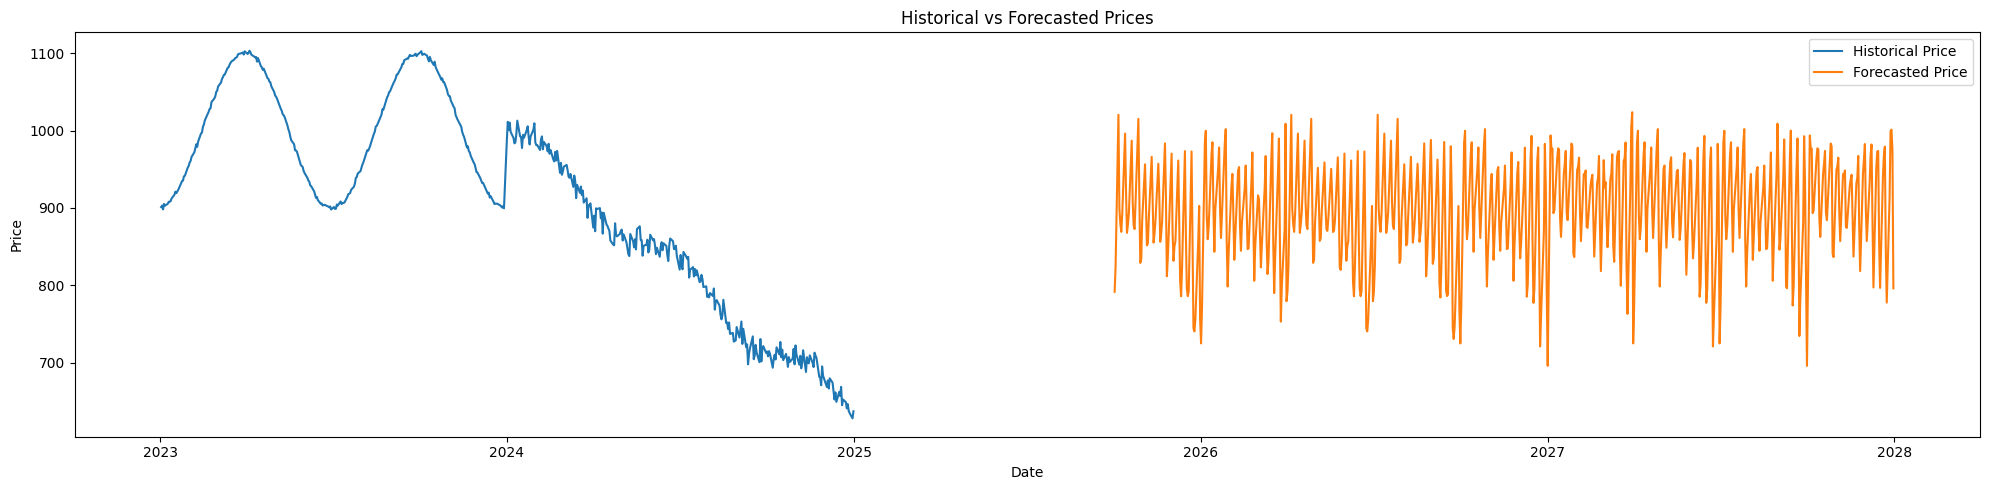

Total forecasted price: 524,474.88


In [482]:
#Graph
plt.figure(figsize=(20, 5))
plt.plot(df_feat['date'], df_feat['price'], label='Historical Price')
plt.plot(forecast.index,  forecast,           label='Forecasted Price')
plt.title('Historical vs Forecasted Prices')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.tight_layout()
plt.show()

total_forecast = forecast.sum()

print(f"Total forecasted price: {total_forecast:,.2f}")

In [483]:
# from statsmodels.tsa.arima.model import ARIMA

# model = ARIMA(y, order=(30, 1, 3))
# model_fit = model.fit(method_kwargs={'maxiter':100, 'disp':False})

# # --- Forecast ---
# n_future_days = x_prediction.shape[0]
# forecast = model_fit.forecast(steps=n_future_days)
# forecast_with_date = x_prediction.copy()

# forecast_with_date['price'] = forecast.values
# forecast = forecast_with_date

# # forecast = pandas.Series(forecast, index=x_prediction.index, name='predicted_price')


In [484]:
# #Graph
# plt.figure(figsize=(20, 5))
# plt.plot(df_feat['date'], df_feat['price'], label='Historical Price')
# plt.plot(forecast.index,  forecast['price'],           label='Forecasted Price')
# plt.title('Historical vs Forecasted Prices')
# plt.xlabel('Date')
# plt.ylabel('Price')
# plt.legend()
# plt.tight_layout()
# plt.show()

# total_forecast = (forecast[forecast['price'] > 0])['price'].sum()
# print(f"Total forecasted price: {total_forecast:,.2f}")

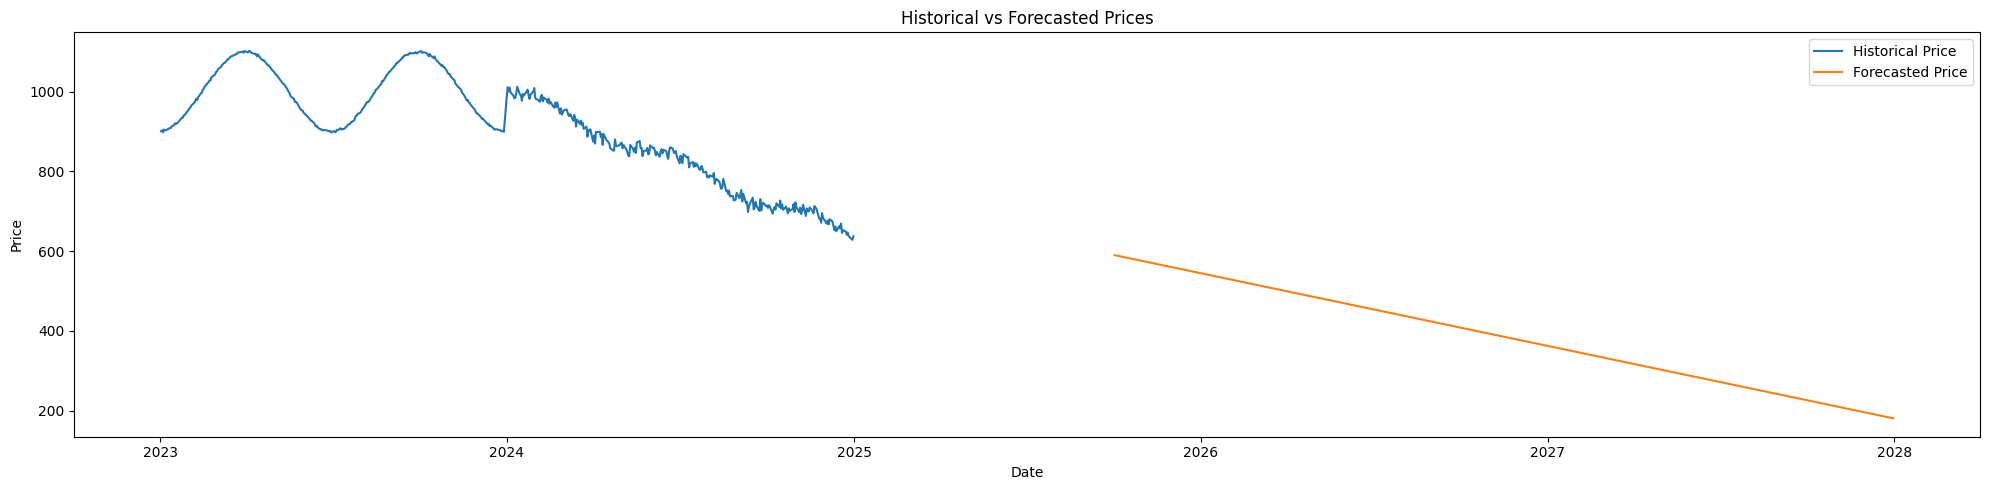

date
2025-10-02    590.026393
2025-10-03    589.527095
2025-10-06    588.029200
2025-10-07    587.529902
2025-10-08    587.030604
                 ...    
2027-12-27    182.599107
2027-12-28    182.099809
2027-12-29    181.600511
2027-12-30    181.101213
2027-12-31    180.601914
Name: predicted_price, Length: 587, dtype: float64
Total forecasted price: 226,004.15


In [485]:
from sklearn.linear_model import LinearRegression,Ridge
model = LinearRegression()
ridge_model = Ridge()

selected_features = ['days_since_start']
x_train = x[selected_features]
x_prediction = predict_df[selected_features]

model.fit(x_train, y)
ridge_model.fit(x_train,y)

preds = model.predict(x_prediction)
forecast = pandas.Series(preds, index=x_prediction.index, name='predicted_price')

# preds = ridge_model.predict(x_prediction)
# forecast_ridge = pandas.Series(preds, index=x_prediction.index, name='predicted_price')

#Graph
plt.figure(figsize=(20, 5))
plt.plot(df_feat['date'], df_feat['price'], label='Historical Price')
plt.plot(forecast.index,  forecast,           label='Forecasted Price')
# plt.plot(forecast_ridge.index,  forecast_ridge,           label='Forecasted Price ridge')
plt.title('Historical vs Forecasted Prices')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.tight_layout()
plt.show()

forecast = forecast[forecast > 0]
total_forecast = forecast.sum()

print(forecast)

print(f"Total forecasted price: {total_forecast:,.2f}")